In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from scipy.stats import zscore
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

PL_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
PL_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [97]:
PL_df.shape

(5000, 14)

Observations on the data set:
1. Dataset provided consists of 5000 records and 14 variables. 
2. 'Personal Loan' is the dependent variable and rest are independent.
3. ID is used to represent the identification of a customer which has no impact on the decision making process, hence ID can be eliminated to build the model.
4. Some values in experience are negative which are not valid as no one can have -ve experience. 0 is perfectly acceptable in this case but not the negative values. Alternatively, these can be replaced with zeroes or these records can be dropped to build a better model.
5. Data set consists of various categories of variables which are explained below:
6. Binary : 
6. Personal Loan : Did the customer accept personal loan offered in the last campaign?
7. Securities Account: Does customer have securities account with bank?
8. CD Account: Does customer have deposits with the bank?
9. Online: Does customer use online banking facilites?
10.Credit card: Does customer use credit card issue by bank?
11.Interval: 
12.Age: Age of customer
13.Experience: No of years of work experience 
14. Income: Annual Income of the customer
15. CC Average: Average spending on credit card per month
16. Mortgage: Value of housing loan if any
17. Ordinal: 
18. Family: No of member in the family
19. Education: 1-Undergrad, 2- Graduate & 3-Advance/Profession


In [98]:
PL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [99]:
# check for missing values
PL_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [100]:
PL_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [101]:
PL_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


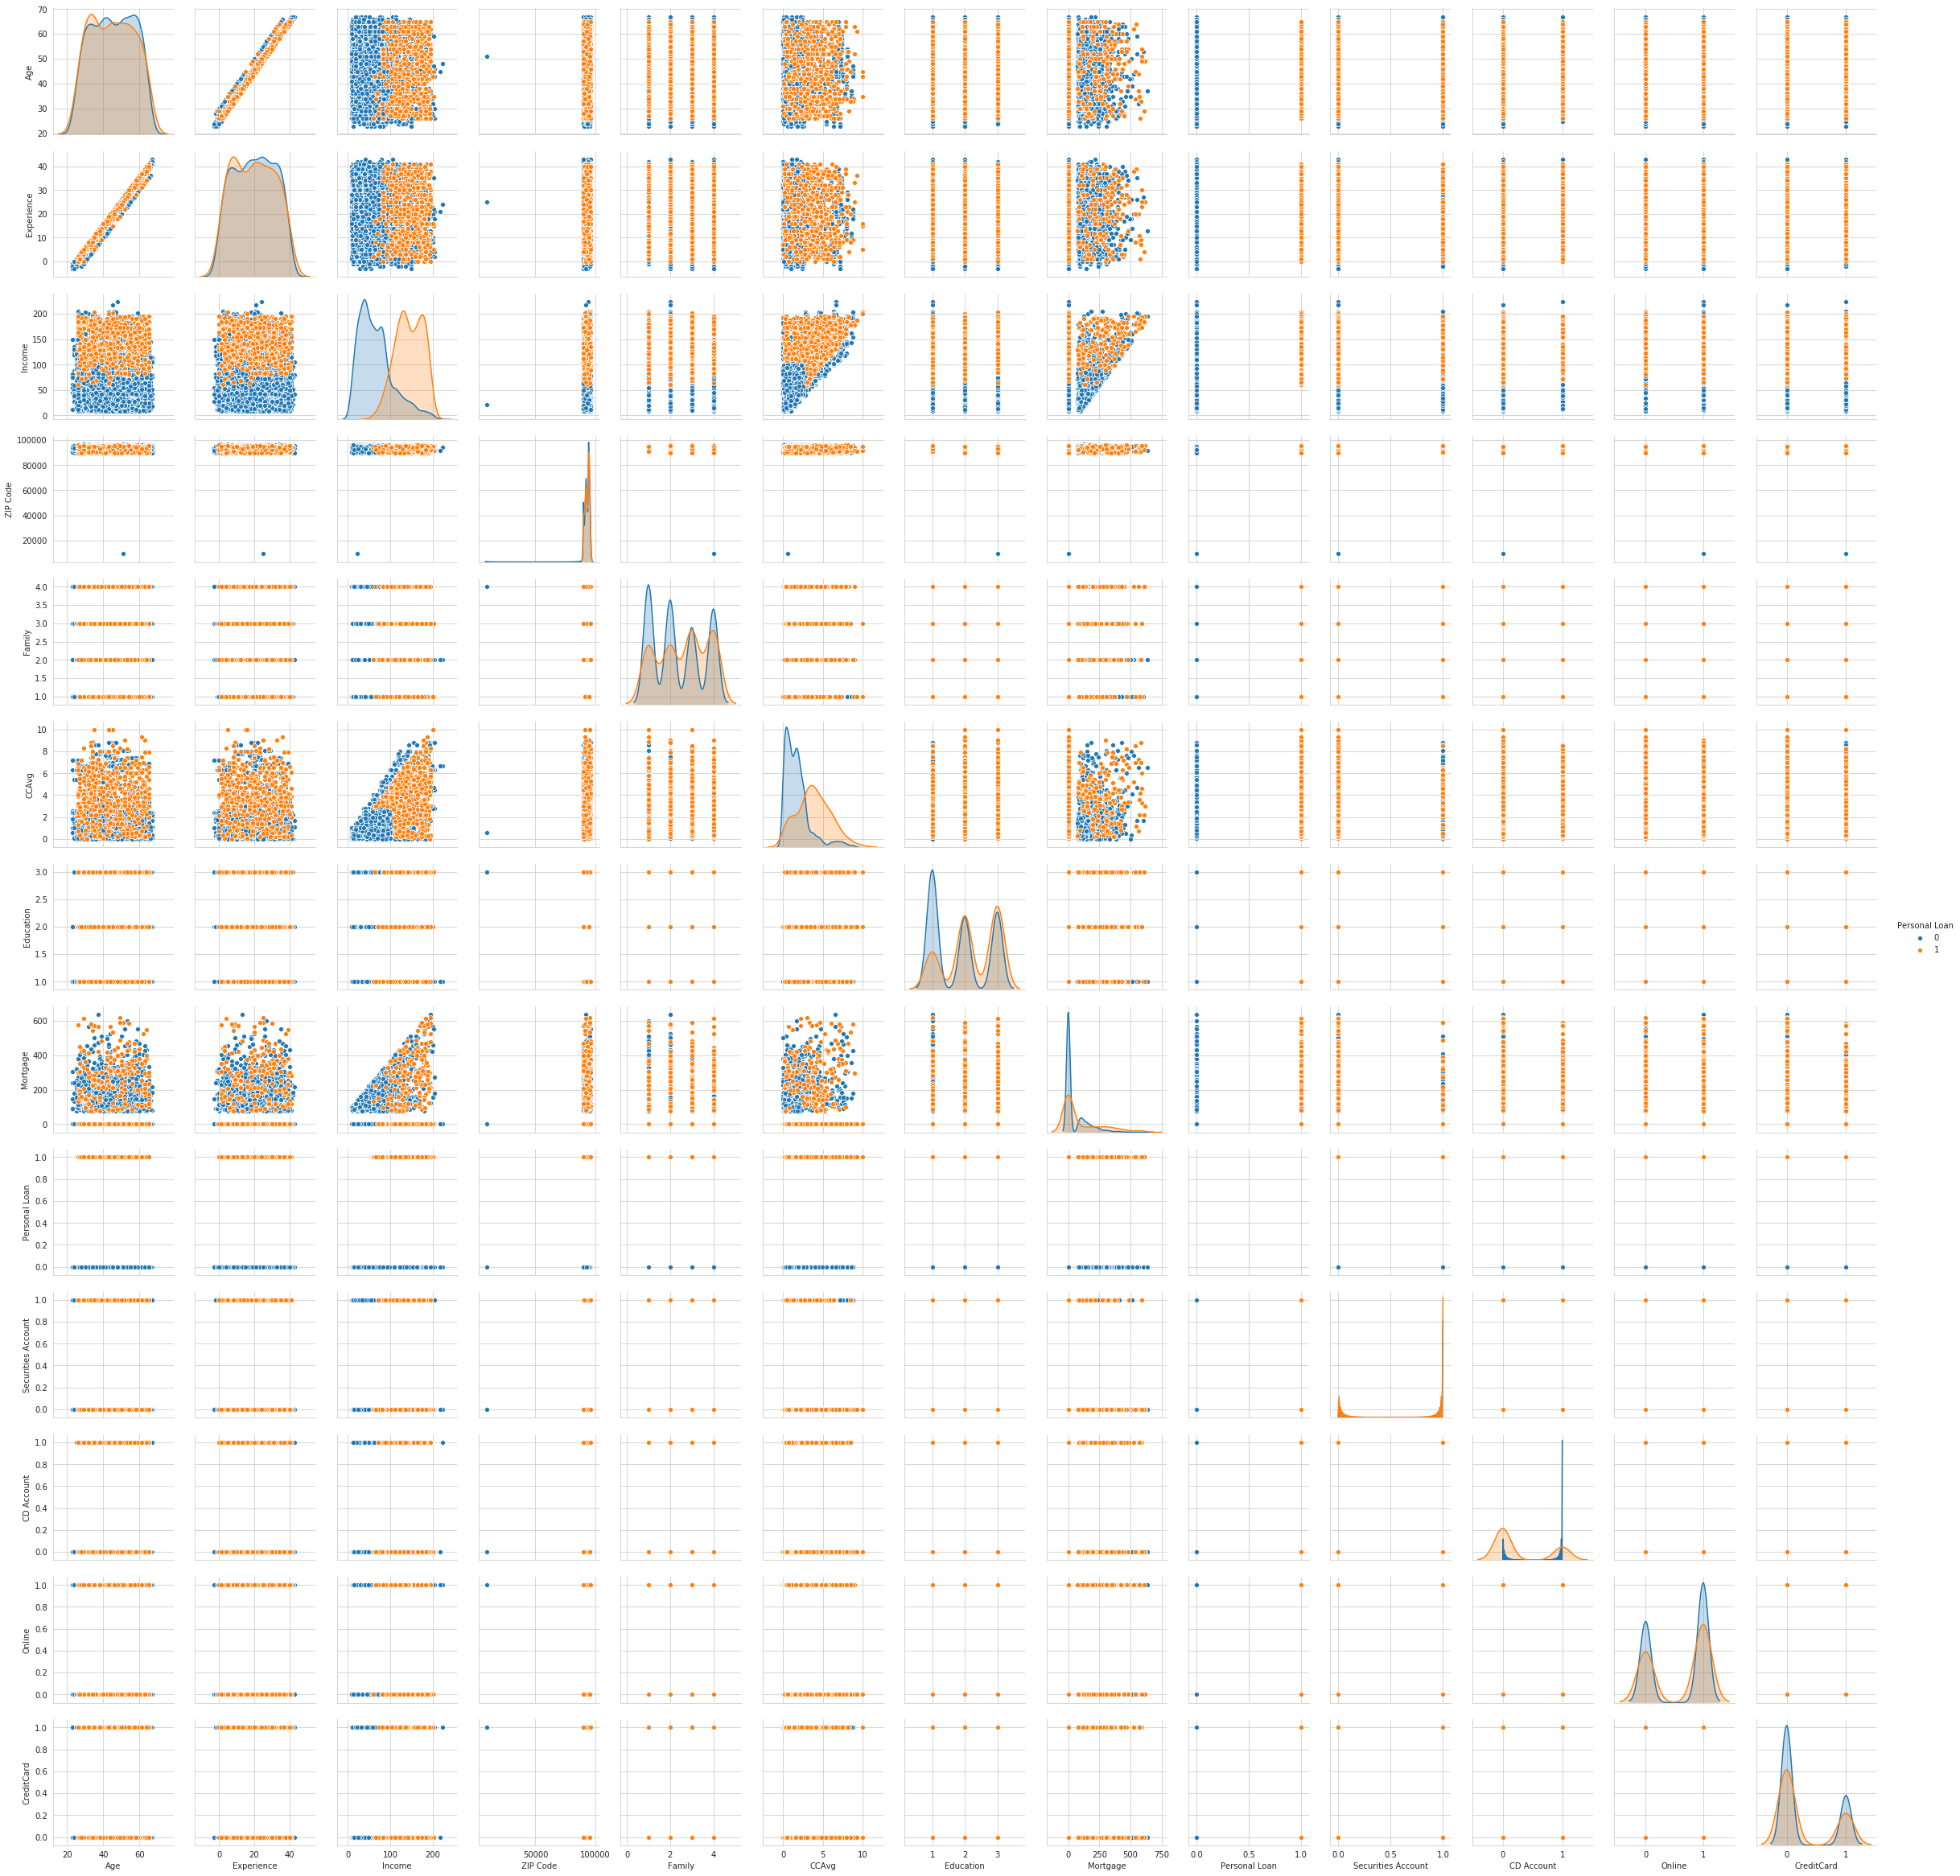

In [102]:
#plotting pair panels excluding ID
sns.pairplot(PL_df.iloc[:,1:], hue = "Personal Loan")

Observations:
1. Age is normally distributed varying from 20 to 60 years. It can be confirmed by looking at the describe summary above where in mean is almost equal to median.
2. Experience is normally distributed starting from 8 years. Mean is equal to Median here as well. There are some records with negative experience. This may be an error in sample. In general there is no possibility of a negative experience. Negative records should be dropped or fill the same with median to build a better model.
3. Income is positively skewed and this can be confirmed by looking at Mean which is greater than Median. Majority of the customer are in the annual income range of 45K & 55K.
4. Credit card averge spend is also positively skewed as mean is greater than median. Majority of the customers are spending less 2.5K per month.
5. Almost 70% of the individuals have less than 40K of mortgage. The maximum mortgage value is however, 635K.

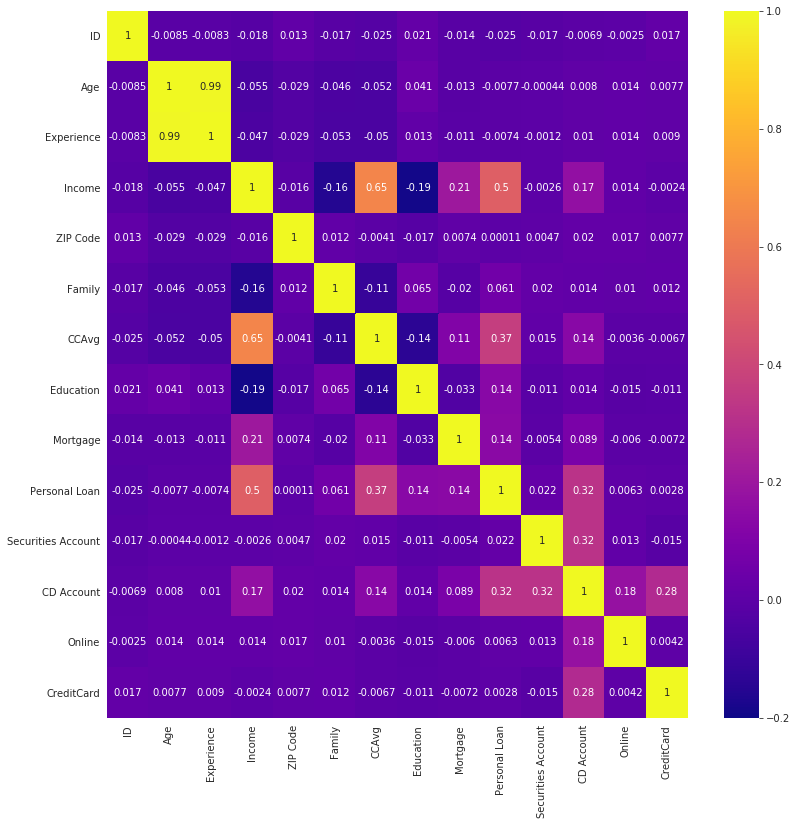

In [103]:
# by looking at the pair plot, we can say 'Age' has storng correlation with 'Experience'
plt.figure(figsize = (13,13))
sns.heatmap(PL_df.corr(),annot=True,cmap='plasma',vmin=-0.2,vmax=1)

#### Observation:
1. In the below map, we can see Age & experience are highly correlated
2. Also credit card average spend & personal loan availed during the last campaing are positively correlated with annual income

For our model to perform better, we need to get rid of the negativa experience values. Since Age & experience are highly correlated,let's fill the same with median experience by age

In [104]:
print("Value counts for negative experience")
print(PL_df[PL_df['Experience'] < 0]['Experience'].value_counts())
print("Value counts for negative experience by age")
print(PL_df[PL_df['Experience'] < 0]['Age'].value_counts())

Value counts for negative experience
-1    33
-2    15
-3     4
Name: Experience, dtype: int64
Value counts for negative experience by age
25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64


### Observation:
1. As we have the values by Age, it is practical to fill the median experience falling in the age range.
2. Filling the sample median to all the negative values would result in incorrect prediction.
3. Also one cannot have experience more than their age. If we look at the describe statement, the median experience is    20 years and the age for negative experience in sample is less than 30 years. 
4. We can defenitely not fill sample median experience to replace all the negative values.

#### Decision: We can replace each negative 'Experience' value with the median of positive 'Experience' value associated with the particular 'Age' group

1. Fetch list of 'Age' values where 'Experience' is -ve
2. Fetch indes where 'Experience' is -ve
3. Using For loop, replace negative experience with median of postive values

In [105]:
ages = PL_df[PL_df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

In [106]:
indexes = PL_df[PL_df['Experience'] < 0].index.tolist()
indexes

[89,
 226,
 315,
 451,
 524,
 536,
 540,
 576,
 583,
 597,
 649,
 670,
 686,
 793,
 889,
 909,
 1173,
 1428,
 1522,
 1905,
 2102,
 2430,
 2466,
 2545,
 2618,
 2717,
 2848,
 2876,
 2962,
 2980,
 3076,
 3130,
 3157,
 3279,
 3284,
 3292,
 3394,
 3425,
 3626,
 3796,
 3824,
 3887,
 3946,
 4015,
 4088,
 4116,
 4285,
 4411,
 4481,
 4514,
 4582,
 4957]

In [107]:
for i in indexes:
    for x in ages:
        PL_df.loc[i,'Experience'] = PL_df[(PL_df.Age == x) & (PL_df.Experience > 0)].Experience.median()

In [108]:
PL_df[PL_df['Experience'] < 0]['Experience'].value_counts()

Series([], Name: Experience, dtype: int64)

In [109]:
PL_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.140400,11.405644,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


We can see minimum values in experience as 0. We are now good to proceed with further analysis.

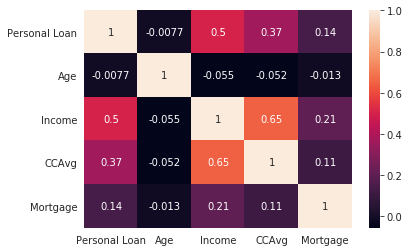

In [110]:
#Let's check the co-relation among the quantitative variables

quant_df = PL_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()
sns.heatmap(quant_df.corr(), annot = True)

### Observation:
1. Age & Mortgage are less correlated with personal loan
2. Annual Income & Mortgage are positively correlated

In [111]:
PL_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


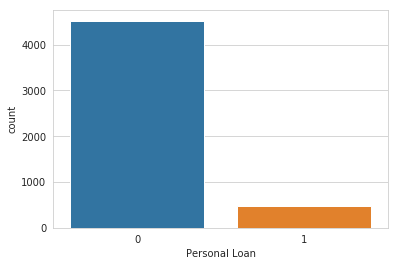

In [112]:
sns.countplot(PL_df["Personal Loan"])

1. Data set consists of 480 records of who availed the personal loan during the last campaign. There is bias of almost 1:10 towards customer not accepting the personal loan.
2. It means 90% of the times, personal loan was not availed. There are high chances that model will perform better towards predicting who won't accept the personal loan.
3. Our target is however to predcit who will accept personal loan.

In [113]:
PL_group = PL_df.groupby("Personal Loan")
PL_df0 = PL_group.get_group(0)
PL_df1 = PL_group.get_group(1)

In [114]:
PL_df0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.171903,11.387552,0.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [115]:
PL_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


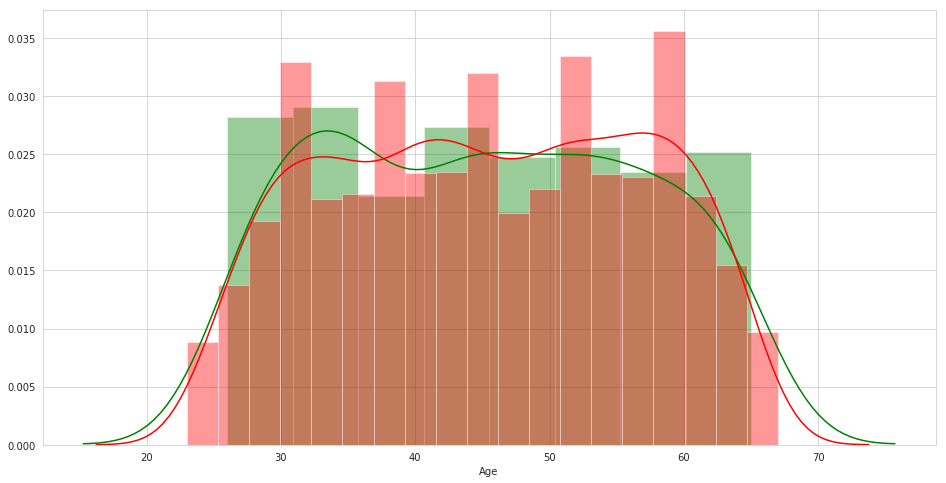

In [116]:
plt.figure(figsize = (16,8))
sns.distplot(PL_df1["Age"], color = 'g')
sns.distplot(PL_df0["Age"], color = 'r')

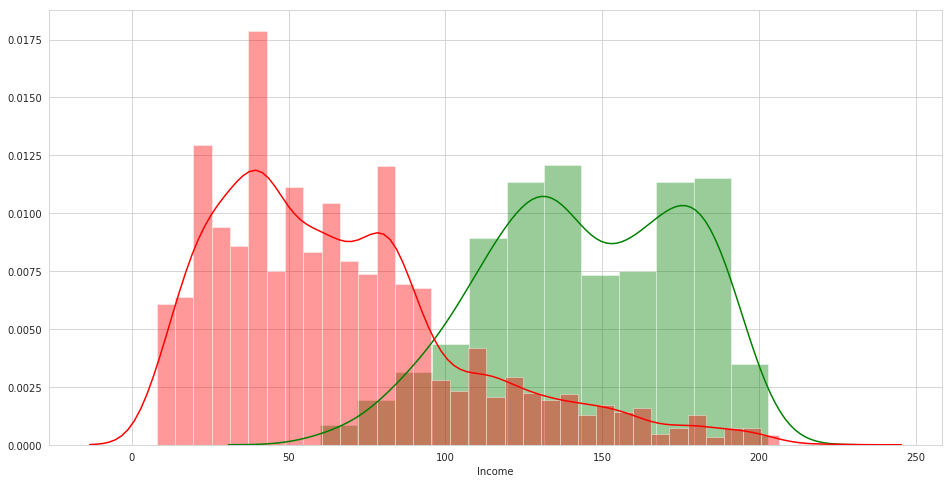

In [117]:
plt.figure(figsize = (16,8))
sns.distplot(PL_df1["Income"], color = 'g')
sns.distplot(PL_df0["Income"], color = 'r')

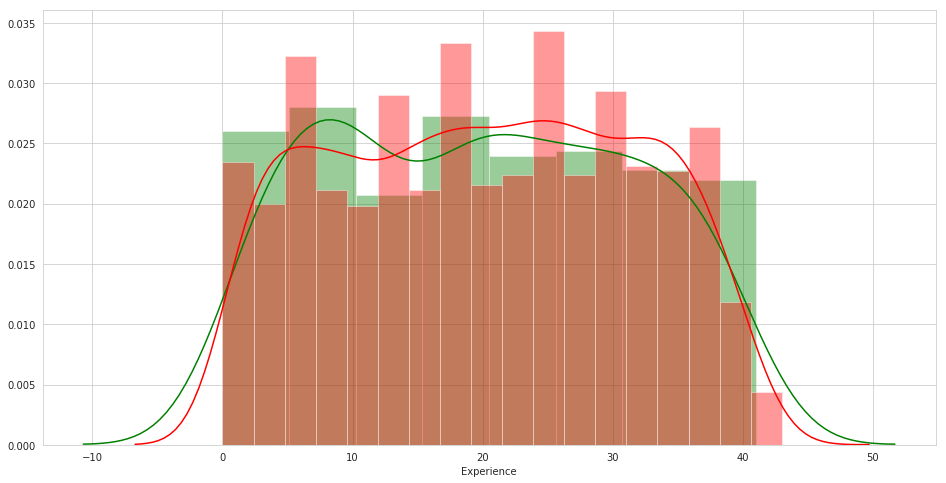

In [118]:
plt.figure(figsize = (16,8))
sns.distplot(PL_df1["Experience"], color = 'g')
sns.distplot(PL_df0["Experience"], color = 'r')

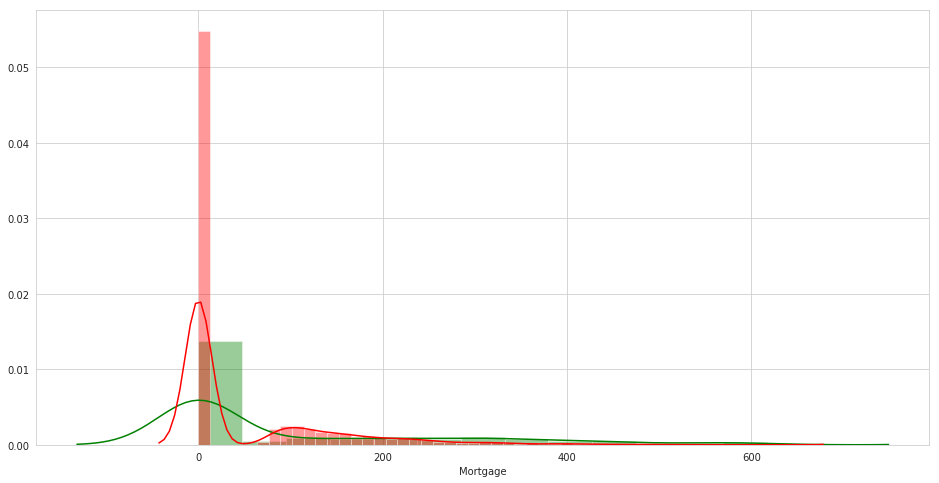

In [119]:
plt.figure(figsize = (16,8))
sns.distplot(PL_df1["Mortgage"], color = 'g')
sns.distplot(PL_df0["Mortgage"], color = 'r')

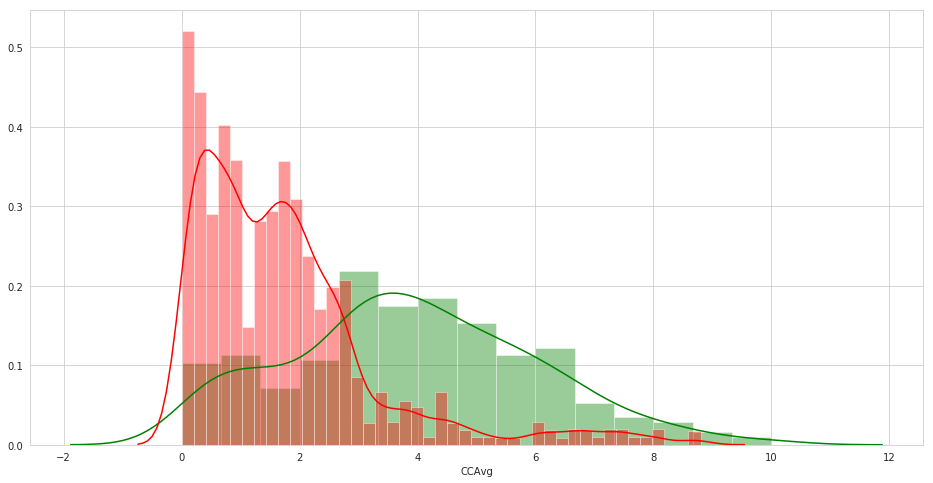

In [120]:
plt.figure(figsize = (16,8))
sns.distplot(PL_df1["CCAvg"], color = 'g')
sns.distplot(PL_df0["CCAvg"], color = 'r')

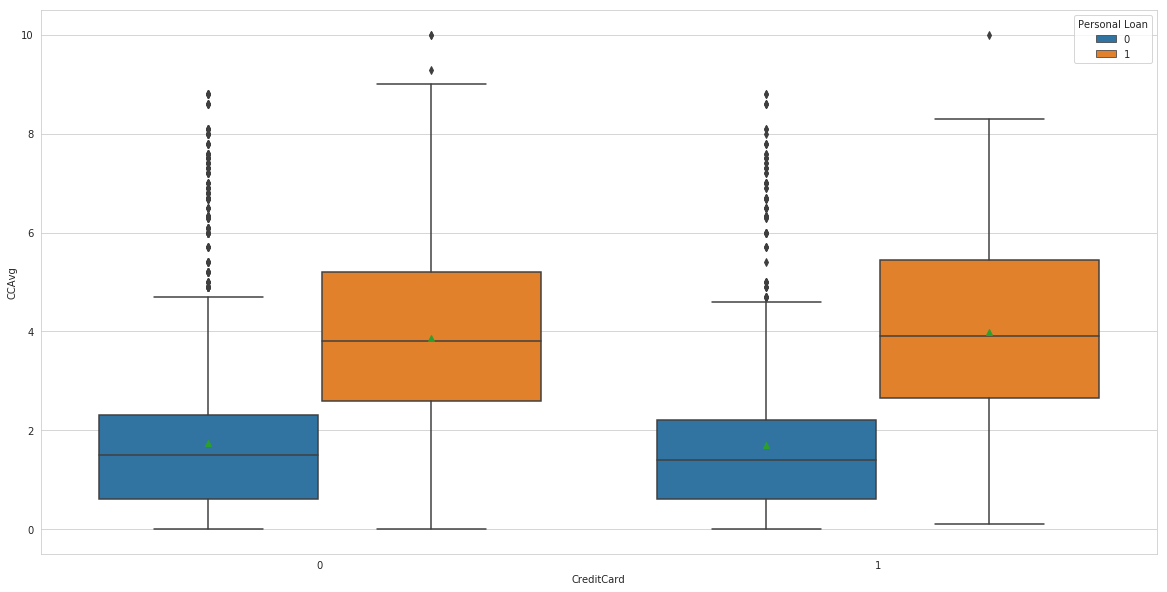

In [121]:
plt.figure(figsize=(20,10))
sns.boxplot('CreditCard','CCAvg',hue = 'Personal Loan',data = PL_df, showmeans = True)

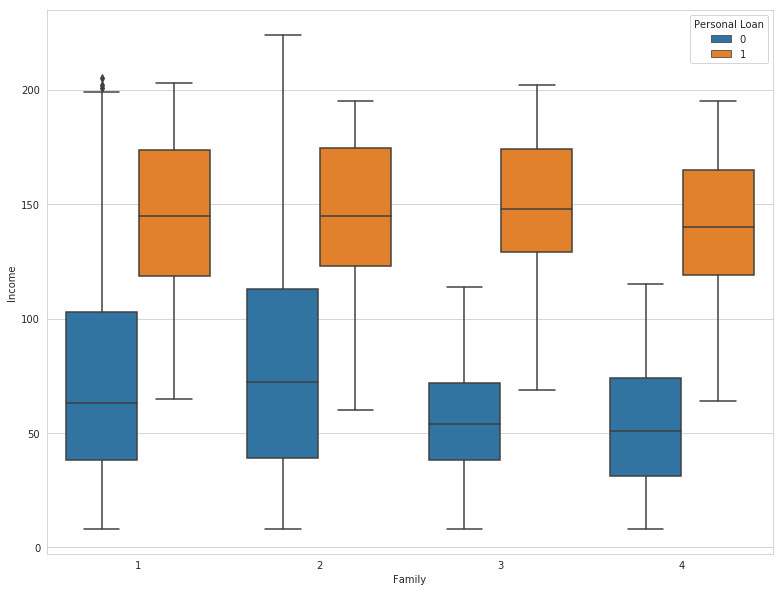

In [122]:
plt.figure(figsize = (13,10))
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=PL_df)

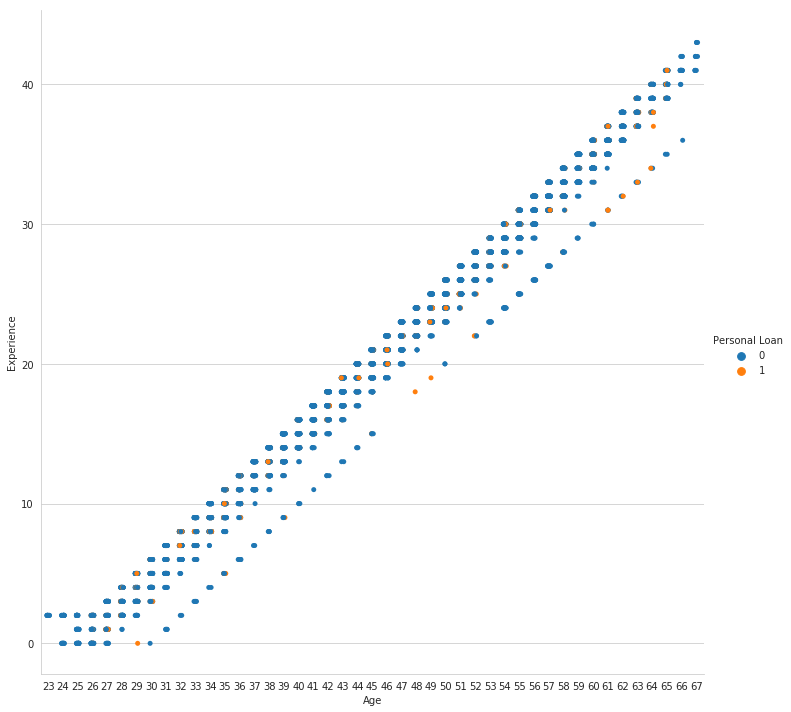

In [123]:
sns.catplot(x='Age', y='Experience', hue ='Personal Loan', data = PL_df, height = 10, aspect=1)

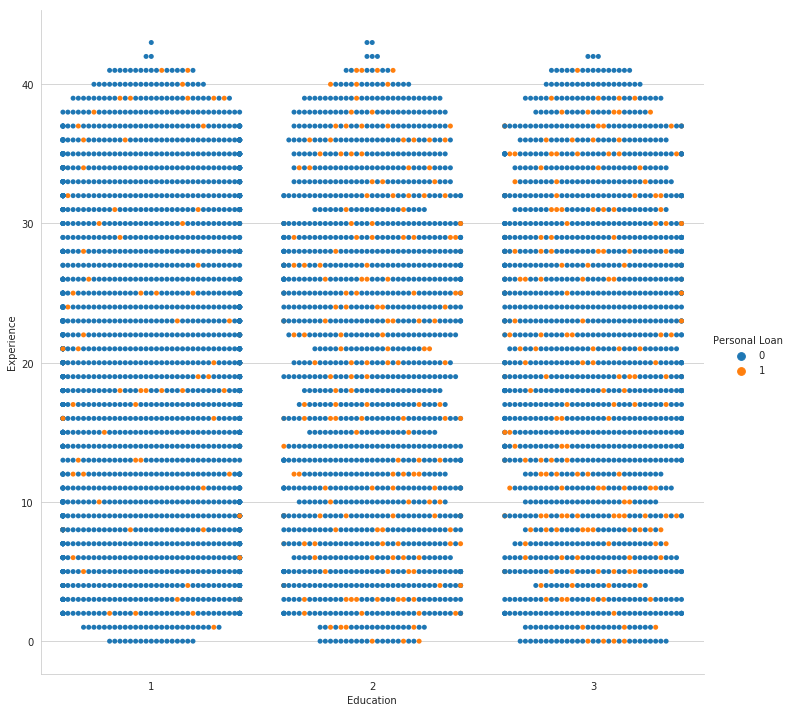

In [124]:
sns.catplot(x='Education', y='Experience', hue ='Personal Loan', data = PL_df, kind='swarm',height = 10, aspect=1)

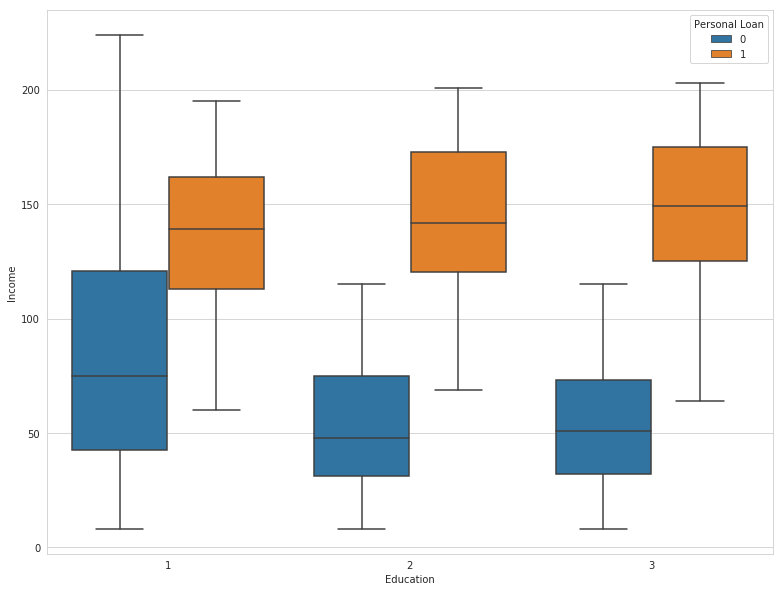

In [125]:
plt.figure(figsize = (13,10))
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=PL_df)

In [126]:
location = PL_df1.groupby("ZIP Code")
Agg_by_location = location.agg({"Personal Loan" : "sum"})
Top10 = Agg_by_location.nlargest(10, "Personal Loan")
Top10

,Personal Loan
ZIP Code,
94720,19
94305,13
92093,9
90089,8
90095,8
94304,8
92182,7
94022,6
95051,6


#### Observation:
1. From above plots, we can see that customers with undergraduate level of education and family > 3 seems to go for personal loan.
2. People opting for the loan have the same income range irrespective of the education level.
3. For customers with education above graduation level, seems family size is not impcting classification.
4. Graduates and Post graduates have a better chance of becoming customers even if they dont have any experience.  Surprisingly, people with Under graduation have the maximum income range.
5. Graduates and above have more chances of taking the personal loan.
6. Customers with personal loan also have a higher CCAvg spends.
7. Customers with income > 100K tend to accept personal loans.
8. Customers with Higher CCAvg tend to accept personal loans.
9. OUt of the 480 positive loan applications, 90 applications are from the locations mentioned. These are the top 10 locations
10. Top location is Berkely followed by Stanford and both are in California.

Defining X, y & training & test splits

In [127]:
X = PL_df.drop(["ID", "Personal Loan", "Age"], axis = 1)
y = PL_df["Personal Loan"]
X.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,49,91107,4,1.6,1,0,1,0,0,0
1,19.0,34,90089,3,1.5,1,0,1,0,0,0
2,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,8.0,45,91330,4,1.0,2,0,0,0,0,1


In [128]:
# declaring the % for test size
test_size = 0.30 

# freezing the random instance, so that same random is used across all the models for better comparison
seed = 20 

# splitting data set between training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Logistic Regression

In [129]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_Predict = LR.predict(X_test)

In [130]:
LR_model_score = LR.score(X_test, y_test)
LR_model_score*100

89.8

In [131]:
metrics.confusion_matrix(y_test, LR_Predict)

array([[1299,   41],
       [ 112,   48]])

#### Analyzing the confusion matrix:
1. True Positives (TP): It's correctly predicted that 1299 customers have not availed personal loan.
2. True Negatives (TN): It's correctly predicted that 48 customer have availed personal loan.
3. False Positives (FP): It's incorrectly predicted that (a "Type I error") 41 customers have availed personal loan.
4. False Negatives (FN): It's incorrectly predicted that (a "Type II error") 112 customers have not availed personal loan.

## KNN (K-Nearest Neighbor)

In [133]:
KNN = KNeighborsClassifier(n_neighbors=11, weights = 'uniform', metric = 'euclidean')
PL_df_z = PL_df.apply(zscore)
PL_df_z.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.731704,-1.774417,-1.678320,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-1.731012,-0.029524,-0.099996,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-1.730319,-0.552992,-0.450734,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-1.729626,-0.901970,-0.976842,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-1.728933,-0.901970,-1.064527,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1.549632


In [134]:
X = PL_df_z.drop(["ID","Personal Loan"], axis = 1)
y = PL_df["Personal Loan"]
KNN.fit(X_train, y_train)
KNN_Predict = KNN.predict(X_test)
KNN.score(X_test, y_test)*100

89.33333333333333

In [135]:
metrics.confusion_matrix(y_test, KNN_Predict)

array([[1323,   17],
       [ 143,   17]])

#### Analyzing the confusion matrix:
1. True Positives (TP): It's correctly predicted that 1323 customers have not availed personal loan.
2. True Negatives (TN): It's correctly predicted that 17 customer have availed personal loan.
3. False Positives (FP): It's incorrectly predicted that (a "Type I error") 17 customers have availed personal loan.
4. False Negatives (FN): It's incorrectly predicted that (a "Type II error")143 customers have not availed personal loan.

## Naive Bayes

In [137]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_Predict = GNB.predict(X_test)
GNB.score(X_test, y_test)*100

89.26666666666667

In [138]:
metrics.confusion_matrix(y_test, GNB_Predict)

array([[1240,  100],
       [  61,   99]])

#### Analyzing the confusion matrix:
1. True Positives (TP): It's correctly predicted that 1240 customers have not availed personal loan.
2. True Negatives (TN): It's correctly predicted that 99 customer have availed personal loan.
3. False Positives (FP): It's incorrectly predicted that (a "Type I error") 100 customers have availed personal loan.
4. False Negatives (FN): It's incorrectly predicted that (a "Type II error")61 customers have not availed personal loan.

## SVM Classifier

In [140]:
SVM = svm.SVC(gamma = 0.025, C = 4)
SVM.fit(X_train, y_train)
SVM_Predict = SVM.predict(X_test)
SVM.score(X_test, y_test)*100

89.53333333333333

In [141]:
metrics.confusion_matrix(y_test, SVM_Predict)

array([[1336,    4],
       [ 153,    7]])

#### Analyzing the confusion matrix:

1. True Positives (TP): It's correctly predicted that 1337 customers have not availed personal loan.
2. True Negatives (TN): It's correctly predicted that 7 customer have availed personal loan.
3. False Positives (FP): It's incorrectly predicted that (a "Type I error") 3 customers have availed personal loan.
4. False Negatives (FN): It's incorrectly predicted that (a "Type II error") 153 customers have not availed personal loan.

Let's check the scores in the classification report. Before checking the same let's take a look at what each score actually means:

#### Precision
    1. Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”
#### Recall
    2. Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”
#### F1 score
    3. The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they consider precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
#### Support
    4. Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process. 

In [154]:
print("Accuracy Scores")
print("Logistic Regression:", LR.score(X_test, y_test)*100,"%")
print("K Nearest Neighbors:", KNN.score(X_test, y_test)*100,"%")
print("Naive Bayes", GNB.score(X_test, y_test)*100,"%")
print("Support Vector Machines", SVM.score(X_test, y_test)*100,"%")


print("Classification Reports")
print("Logistic Regression")
print(metrics.classification_report(y_test, LR_Predict))

print("K Nearest Neighbors")
print(metrics.classification_report(y_test, KNN_Predict))

print("Naive Bayes")
print(metrics.classification_report(y_test, GNB_Predict))

print("Support Vector Machine Classifier")
print(metrics.classification_report(y_test, SVM_Predict))

Accuracy Scores
Logistic Regression: 89.8 %
K Nearest Neighbors: 89.33333333333333 %
Naive Bayes 89.26666666666667 %
Support Vector Machines 89.53333333333333 %
Classification Reports
Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1340
           1       0.54      0.30      0.39       160

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.73      0.63      0.66      1500
weighted avg       0.88      0.90      0.88      1500

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1340
           1       0.50      0.11      0.18       160

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.55      0.56      1500
weighted avg       0.86      0.89      0.86      1500

Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1340
 

### Analysis:
1. Since the data set is not balanced set, we can't rely on the overall accuracy score of the model. We need to check the class-wise accuracy scores
2. Looking at the above scores, it can be inferred that all the models are performing better in classifying the customers who have not availed personal loan.
3. Where as the accuracy level for predicting the customers availing the loan is not as expected.
4. If we compare among the 3 models, Logistic Regression, K Nearest Neighbors & Naive Bayes - K Nearest Neighbors is giving more accurate results. The same can be confirmed by looking at the recall scores.
5. Even though not asked in the question, I have just checked the predictions with SVM classifier. Surprisingly, it is performing better than any of the previous models. We can confirm the same by looking at the precision,recall & f1-score.
6. Overall, since the data set is not balanced and is kind of more biased towards customers not availed personal loan, all the models are giving better results in predicting the class '0' instead of calss '1'.
7. To build the better models in cases like these, we will have better results with the stratified sampling data.
8. Alternatively, we can also validate the models by k-fold mechanism where in the the data set would be divided in the 'n' flods specified and compare the results of each fold against the 'n-1' folds. This is more preactical to check the average accuracy of of all the results combined. Let's take a look further on the same.

#### Cross Validation of Models

    The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same  random seed to ensure that the same splits to the training data are performed and each 
    algorithm is evaluated in precisely the same way.

Accuracy Scores in 10-fold cross validation procedure
LR: 95.120000 (0.005879)
KNN: 95.880000 (0.006337)
NB: 88.200000 (0.010807)
SVM: 97.460000 (0.004903)


[Text(0, 0, 'LR'), Text(0, 0, 'KNN'), Text(0, 0, 'NB'), Text(0, 0, 'SVM')]

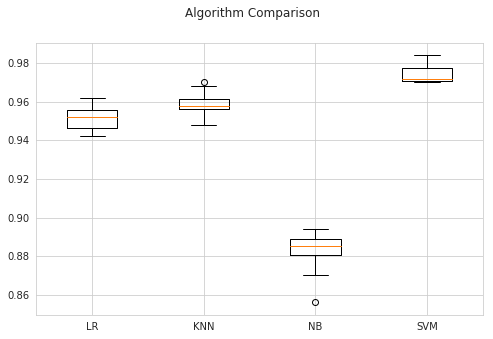

In [143]:
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print("Accuracy Scores in 10-fold cross validation procedure")
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = (8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Final Observation:
Overall, we can see KNN is giving better results among the 3 models asked in question. However, when SVM is also considered, it perfroming better than all the algorithms with average accuracy score of 97.46% followed by KNN 95.88% and Logistic Regression 95.12%

### Decision:
    Bank has approached to find out the relation among the various parameters in identifying whether a customer would opt for personal or not. We have provided our observations on various paramters and how they are related. We have also provided the top 10 locations of customers availing personal loan.
    
    While it comes to the selection of a model for predicting the prospective, we recommend to proceed with Support Vector Machine Classifer or K Nearest Neighbors.